# TCC UNICAMP - PREDIÇÃO CASOS DE CASOS DE COVID

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
covid_data = pd.read_csv('./owid-covid-data.csv')
#covid_data.groupby('iso_code').sum()
covid_data["iso_code"]

0         AFG
1         AFG
2         AFG
3         AFG
4         AFG
         ... 
166321    ZWE
166322    ZWE
166323    ZWE
166324    ZWE
166325    ZWE
Name: iso_code, Length: 166326, dtype: object

## Coeficiente de Person
É um coeficiente que mede o grau de correlação através do cálculo de direção positiva ou negativa.
* p = 0,9 a 1 - Correlação muito forte
* p = 0,7 a 0,9 - Correlação forte
* p = 0,5 a 0,7 - Correlação moderada
* p = 0,3 a 0,5 - Correlação fraca
* p = 0 a 0,3 - Não possui correlação 

<AxesSubplot:>

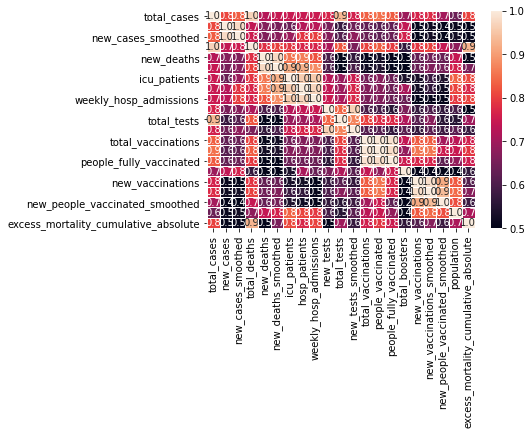

In [3]:
#análise e plot de correlação
correlation = covid_data.corr()
correlation=correlation.loc[correlation.total_cases>0.5,correlation.total_cases>0.5]
plot = sn.heatmap(correlation,annot = True, fmt = ".1f",linewidth=1,vmin=0.5,vmax=1)
plot
#plt.savefig("Correlation_maior_0.5.pdf")

In [4]:
correlation.head(20)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,icu_patients,hosp_patients,weekly_hosp_admissions,new_tests,...,new_tests_smoothed,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,excess_mortality_cumulative_absolute
total_cases,1.000000,0.808562,0.829170,0.967826,0.723079,0.743590,0.746292,0.744325,0.748691,0.765188,...,0.759494,0.831699,0.850363,0.827064,0.694453,0.762447,0.775286,0.703825,0.637276,0.802074
new_cases,0.808562,1.000000,0.977001,0.736538,0.667384,0.653483,0.635509,0.722059,0.727972,0.656200,...,0.638998,0.626172,0.613076,0.627196,0.738232,0.508177,0.516685,0.424128,0.513535,0.463834
new_cases_smoothed,0.829170,0.977001,1.000000,0.750963,0.663314,0.673491,0.693236,0.786314,0.797985,0.671401,...,0.678190,0.636643,0.622541,0.636644,0.760303,0.504773,0.523541,0.430645,0.524432,0.508948
total_deaths,0.967826,0.736538,0.750963,1.000000,0.779774,0.801775,0.788974,0.767688,0.766945,0.714181,...,0.657075,0.802579,0.828345,0.793905,0.569922,0.787590,0.802416,0.742845,0.678685,0.927746
new_deaths,0.723079,0.667384,0.663314,0.779774,1.000000,0.975801,0.856405,0.863539,0.819879,0.599431,...,0.565683,0.506575,0.524267,0.479869,0.339605,0.628107,0.642813,0.630880,0.740648,0.489406
new_deaths_smoothed,0.743590,0.653483,0.673491,0.801775,0.975801,1.000000,0.921888,0.925214,0.879875,0.598772,...,0.595716,0.521472,0.539193,0.492861,0.348700,0.635161,0.662726,0.649743,0.759933,0.654966
icu_patients,0.746292,0.635509,0.693236,0.788974,0.856405,0.921888,1.000000,0.959991,0.956864,0.723365,...,0.750976,0.648255,0.669512,0.636473,0.536586,0.531274,0.577472,0.540743,0.835468,0.810507
hosp_patients,0.744325,0.722059,0.786314,0.767688,0.863539,0.925214,0.959991,1.000000,0.969916,0.736543,...,0.766080,0.662165,0.666285,0.640375,0.708104,0.526867,0.563449,0.518153,0.806247,0.770648
weekly_hosp_admissions,0.748691,0.727972,0.797985,0.766945,0.819879,0.879875,0.956864,0.969916,1.000000,0.747430,...,0.770499,0.655761,0.660377,0.635262,0.633349,0.486625,0.504626,0.457471,0.791821,0.803283
new_tests,0.765188,0.656200,0.671401,0.714181,0.599431,0.598772,0.723365,0.736543,0.747430,1.000000,...,0.964680,0.597172,0.593507,0.553405,0.655835,0.570772,0.600168,0.565315,0.592622,0.487234


In [5]:
correlation.loc[correlation.total_cases>0.5,correlation.total_cases>0.5]

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,icu_patients,hosp_patients,weekly_hosp_admissions,new_tests,...,new_tests_smoothed,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,excess_mortality_cumulative_absolute
total_cases,1.000000,0.808562,0.829170,0.967826,0.723079,0.743590,0.746292,0.744325,0.748691,0.765188,...,0.759494,0.831699,0.850363,0.827064,0.694453,0.762447,0.775286,0.703825,0.637276,0.802074
new_cases,0.808562,1.000000,0.977001,0.736538,0.667384,0.653483,0.635509,0.722059,0.727972,0.656200,...,0.638998,0.626172,0.613076,0.627196,0.738232,0.508177,0.516685,0.424128,0.513535,0.463834
new_cases_smoothed,0.829170,0.977001,1.000000,0.750963,0.663314,0.673491,0.693236,0.786314,0.797985,0.671401,...,0.678190,0.636643,0.622541,0.636644,0.760303,0.504773,0.523541,0.430645,0.524432,0.508948
total_deaths,0.967826,0.736538,0.750963,1.000000,0.779774,0.801775,0.788974,0.767688,0.766945,0.714181,...,0.657075,0.802579,0.828345,0.793905,0.569922,0.787590,0.802416,0.742845,0.678685,0.927746
new_deaths,0.723079,0.667384,0.663314,0.779774,1.000000,0.975801,0.856405,0.863539,0.819879,0.599431,...,0.565683,0.506575,0.524267,0.479869,0.339605,0.628107,0.642813,0.630880,0.740648,0.489406
new_deaths_smoothed,0.743590,0.653483,0.673491,0.801775,0.975801,1.000000,0.921888,0.925214,0.879875,0.598772,...,0.595716,0.521472,0.539193,0.492861,0.348700,0.635161,0.662726,0.649743,0.759933,0.654966
icu_patients,0.746292,0.635509,0.693236,0.788974,0.856405,0.921888,1.000000,0.959991,0.956864,0.723365,...,0.750976,0.648255,0.669512,0.636473,0.536586,0.531274,0.577472,0.540743,0.835468,0.810507
hosp_patients,0.744325,0.722059,0.786314,0.767688,0.863539,0.925214,0.959991,1.000000,0.969916,0.736543,...,0.766080,0.662165,0.666285,0.640375,0.708104,0.526867,0.563449,0.518153,0.806247,0.770648
weekly_hosp_admissions,0.748691,0.727972,0.797985,0.766945,0.819879,0.879875,0.956864,0.969916,1.000000,0.747430,...,0.770499,0.655761,0.660377,0.635262,0.633349,0.486625,0.504626,0.457471,0.791821,0.803283
new_tests,0.765188,0.656200,0.671401,0.714181,0.599431,0.598772,0.723365,0.736543,0.747430,1.000000,...,0.964680,0.597172,0.593507,0.553405,0.655835,0.570772,0.600168,0.565315,0.592622,0.487234


In [6]:
correlation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, total_cases to excess_mortality_cumulative_absolute
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   total_cases                           21 non-null     float64
 1   new_cases                             21 non-null     float64
 2   new_cases_smoothed                    21 non-null     float64
 3   total_deaths                          21 non-null     float64
 4   new_deaths                            21 non-null     float64
 5   new_deaths_smoothed                   21 non-null     float64
 6   icu_patients                          21 non-null     float64
 7   hosp_patients                         21 non-null     float64
 8   weekly_hosp_admissions                21 non-null     float64
 9   new_tests                             21 non-null     float64
 10  total_tests                           21 non-null

In [8]:
correlation["new_cases"].value_counts()

0.0         39839
1.0          3778
2.0          2528
3.0          2023
4.0          1711
            ...  
355260.0        1
436265.0        1
410530.0        1
418349.0        1
4180.0          1
Name: new_cases, Length: 21873, dtype: int64

In [14]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.632930e+05,1.631330e+05,1.611500e+05,1.454510e+05,145487.000000,143390.000000,162535.000000,162375.000000,160398.000000,144706.000000,...,106050.000000,104595.000000,68569.000000,123664.000000,155268.000000,136253.000000,5.696000e+03,5696.000000,5696.000000,5696.000000
mean,2.536044e+06,1.157084e+04,1.156560e+04,5.766407e+04,171.137304,172.673031,29447.756785,166.431538,165.507110,509.384956,...,10.627229,32.778221,50.788710,3.027816,73.576309,0.725587,3.761302e+04,9.404336,15.967077,972.197816
std,1.543441e+07,8.442598e+04,8.257830e+04,3.021145e+05,832.251328,817.024076,51852.379656,683.021740,532.174029,784.551311,...,10.558306,13.523688,31.811788,2.450110,7.491615,0.149964,1.043065e+05,16.439173,30.092830,1420.342295
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.001000e+03,1.000000e+00,7.000000e+00,7.900000e+01,0.000000,0.143000,623.579000,0.042000,1.630000,18.580250,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-7.515000e+01,-0.722500,-0.752500,-29.788442
50%,2.611700e+04,7.900000e+01,1.071430e+02,7.830000e+02,2.000000,2.429000,4731.521000,11.439000,18.829000,127.737500,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.424600e+03,6.065000,7.195000,473.393182
75%,2.987020e+05,1.063000e+03,1.146000e+03,7.307000e+03,20.000000,21.286000,37724.466000,101.289500,120.859750,711.954750,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.478462e+04,14.520000,22.997500,1656.361067
max,4.451295e+08,4.206334e+06,3.444237e+06,5.995245e+06,18020.000000,14689.143000,706541.904000,51427.491000,16052.608000,6322.263000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.080748e+06,111.010000,374.930000,9153.060433


### Função para criar conjunto de testes 

In [19]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(covid_data))
    test_set_size = int(len(covid_data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [20]:
train_set,test_set = split_train_test(covid_data,0.2)

In [21]:
print(len(train_set), "train +", len(test_set), "test")

133061 train + 33265 test
